# Simple EDA With Pandas(ydata) Profiling

In [1]:
import os
import pandas as pd
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')
from ydata_profiling import ProfileReport
# Kalau tidak bisa , gunakan from pandas_profiling import ProfileRepor

## Data Cleaning

Data from https://www.kaggle.com/datasets/nikhil1e9/loan-default

In [2]:
data = pd.read_csv("data/Loan_default.csv")
data.head(3)

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio   Education  \
0               4         15.23        36      0.44  Bachelor's   
1               1          4.81        60      0.68    Master's   
2               3         21.17        24      0.31    Master's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1

### Feature Detail

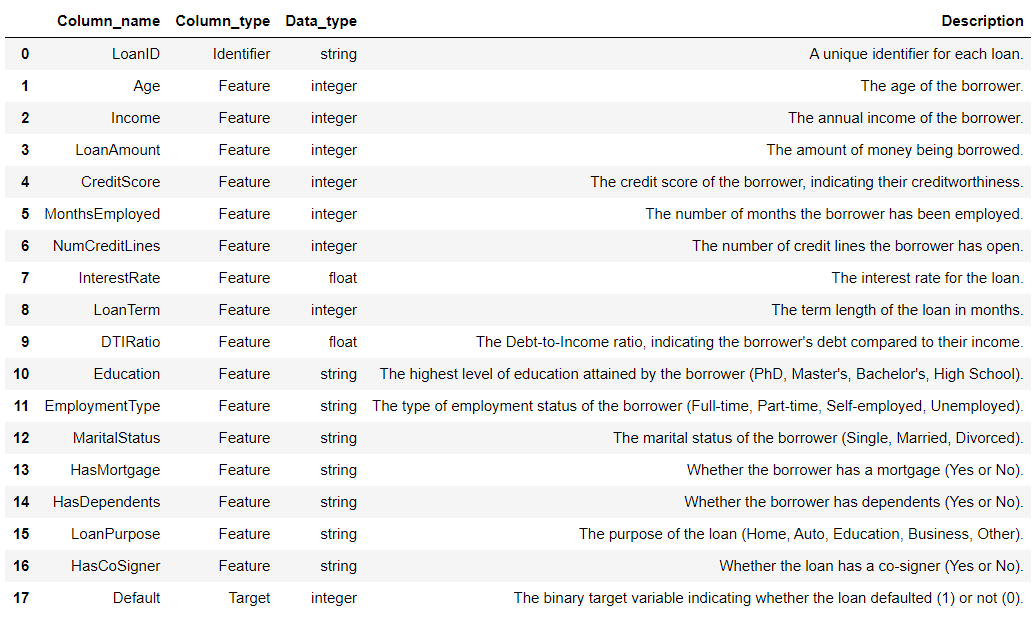

In [3]:
Image(filename='picture/feature.png')

### EDA Function

In [4]:
def create_eda_report(data):
    results = []

    for column in data.columns:
        column_name = column
        column_type = str(data[column].dtype)
        unique_count = len(data[column].unique())
        total = len(data)
        null_count = data[column].isnull().sum()
        non_null_count = data[column].notnull().sum()
        null_percentage = f"{(null_count / total * 100):.2f}%"

        if data[column].dtype == 'object':
            most_frequent = data[column].value_counts().index[0]
            mode_percentage = f"{(data[column].value_counts(normalize=True)[most_frequent] * 100):.2f}%"
            mean_or_top1 = ""
            min_or_bottom = str(data[column].value_counts().index[-1])
            if len(data[column].value_counts()) >= 2:
                min_or_bottom += f": {(data[column].value_counts().values[-1] / total * 100):.2f}%"
            max_or_top1 = str(data[column].value_counts().index[0])
            if len(data[column].value_counts()) >= 2:
                max_or_top1 += f": {(data[column].value_counts().values[0] / total * 100):.2f}%"
        else:
            most_frequent = ""
            mode_percentage = ""
            mean_or_top1 = f"{data[column].mean():.3f}"
            min_or_bottom = data[column].min()
            max_or_top1 = data[column].max()

        results.append({
            'column_name': column_name,
            'type': column_type,
            'unique_count': unique_count,
            'total': total,
            'null_count': null_count,
            'non_null_count': non_null_count,
            'null_percentage': null_percentage,
            'most_frequent': most_frequent,
            'mode_percentage': mode_percentage,
            'mean': mean_or_top1,
            'min_or_bottom': min_or_bottom,
            'max_or_top1': max_or_top1
        })

 
    column_info = pd.DataFrame(results)

    return column_info


eda_result = create_eda_report(data)

eda_result.to_excel('output/eda.xlsx', index=False)


### Pandas Profiling

In [5]:
profile = ProfileReport(data, title='EDA With Pandas Profiling', explorative=True)
profile.to_file("output/EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile

## Sample Output Manual EDA Function

In [7]:
eda_result

column_name     type  unique_count   total  null_count  non_null_count  \
0           LoanID   object        255347  255347           0          255347   
1              Age    int64            52  255347           0          255347   
2           Income    int64        114620  255347           0          255347   
3       LoanAmount    int64        158729  255347           0          255347   
4      CreditScore    int64           550  255347           0          255347   
5   MonthsEmployed    int64           120  255347           0          255347   
6   NumCreditLines    int64             4  255347           0          255347   
7     InterestRate  float64          2301  255347           0          255347   
8         LoanTerm    int64             5  255347           0          255347   
9         DTIRatio  float64            81  255347           0          255347   
10       Education   object             4  255347           0          255347   
11  EmploymentType   object             4  255347           0          255347   
12   MaritalStatus   object             3  255347           0          255347   
13     HasMortgage   object             2  255347           0          255347   
14   HasDependents   object             2  255347           0          255347   
15     LoanPurpose   object             5  255347           0          255347   
16     HasCoSigner   object             2  255347           0          255347   
17         Default    int64             2  255347           0          255347   

   null_percentage most_frequent mode_percentage        mean  \
0            0.00%    I38PQUQS96           0.00%               
1            0.00%                                    43.498   
2            0.00%                                 82499.305   
3            0.00%                                127578.866   
4            0.00%                                   574.264   
5            0.00%                                    59.542   
6            0.00%                                     2.501   
7            0.00%                                    13.493   
8            0.00%                                    36.026   
9            0.00%                                     0.500   
10           0.00%    Bachelor's          25.21%               
11           0.00%     Part-time          25.13%               
12           0.00%       Married          33.41%               
13           0.00%           Yes          50.00%               
14           0.00%           Yes          50.03%               
15           0.00%      Business          20.09%               
16           0.00%           Yes          50.01%               
17           0.00%                                     0.116   

        min_or_bottom         max_or_top1  
0   ZTH91CGL0B: 0.00%   I38PQUQS96: 0.00%  
1                  18                  69  
2               15000              149999  
3                5000              249999  
4                 300                 849  
5                   0                 119  
6                   1                   4  
7                 2.0                25.0  
8                  12                  60  
9                 0.1                 0.9  
10        PhD: 24.88%  Bachelor's: 25.21%  
11  Full-time: 24.93%   Part-time: 25.13%  
12     Single: 33.29%     Married: 33.41%  
13         No: 50.00%         Yes: 50.00%  
14         No: 49.97%         Yes: 50.03%  
15       Auto: 19.91%    Business: 20.09%  
16         No: 49.99%         Yes: 50.01%  
17                  0                   1

## Sample Output Pandas Profiling

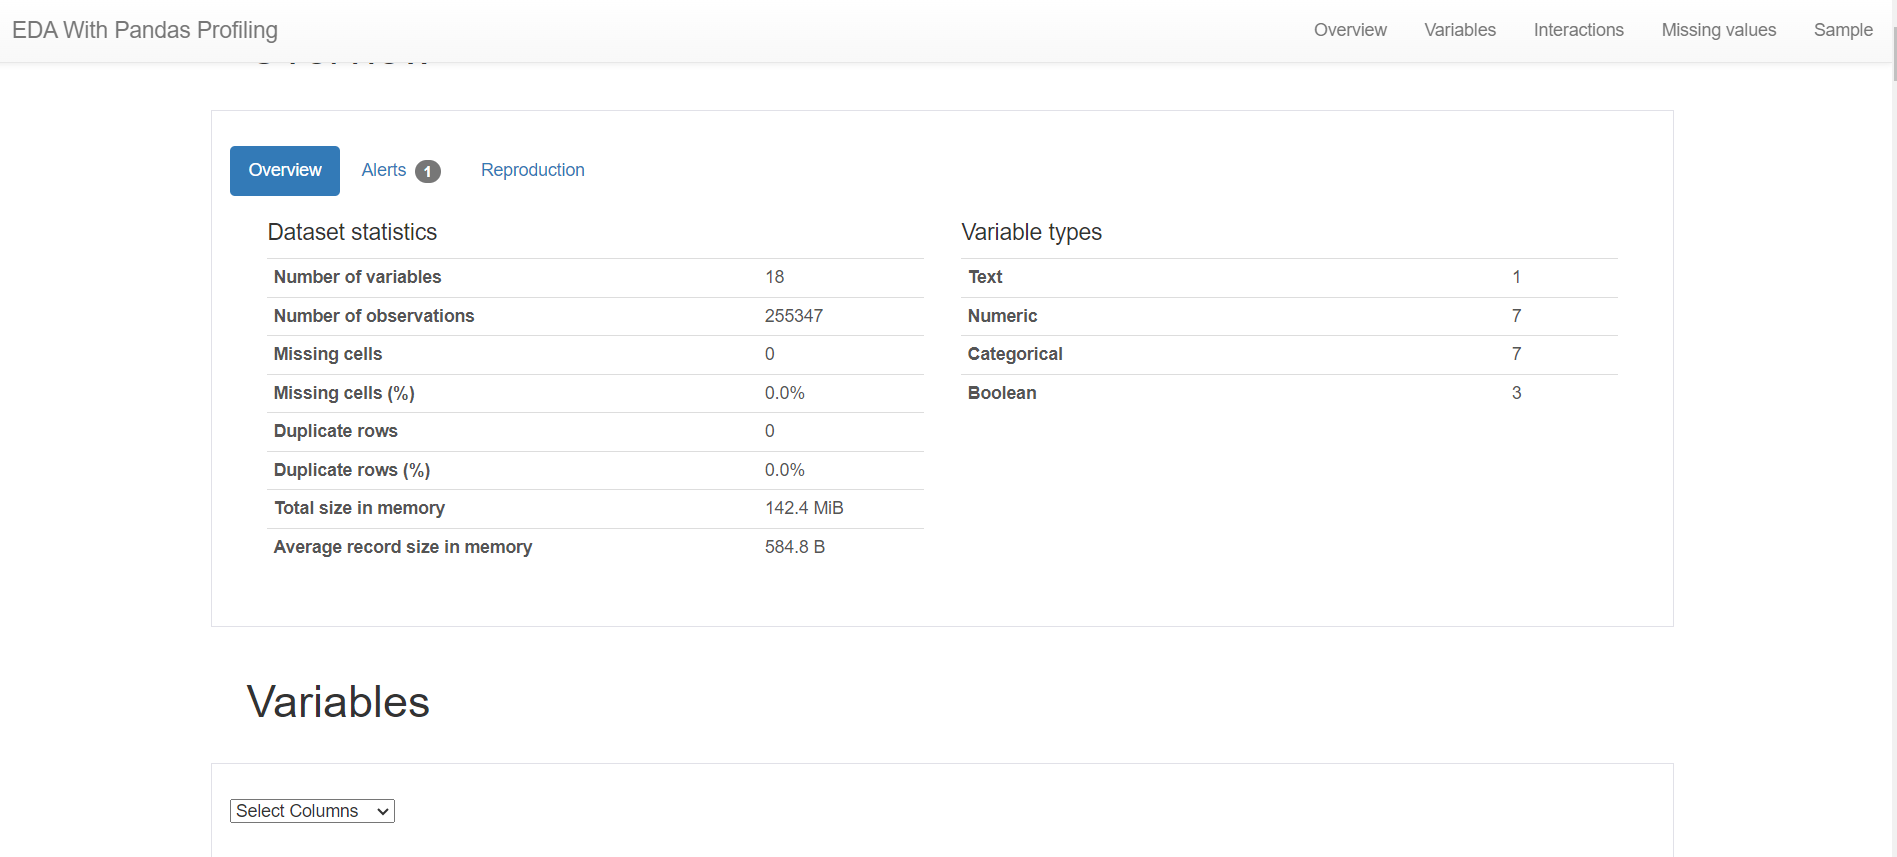

In [8]:
Image(filename='picture/ss_pp.png')